<a href="https://colab.research.google.com/github/vimukthisandeepa/programing/blob/main/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q
!pip install opendatasets -q




In [3]:
#import libries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od
import time

In [4]:
od.download("https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vimukthisandeepa
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification


100%|██████████| 217M/217M [00:08<00:00, 27.2MB/s]


In [5]:
batch_size = 32
img_size =(128,128)

In [6]:
trin_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/test"
test_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/train"

In [7]:
trin_data =tf.keras.utils.image_dataset_from_directory(trin_data_dir,image_size=img_size,batch_size=batch_size ,subset="training",validation_split=0.1,seed =42)
validation_data =tf.keras.utils.image_dataset_from_directory(trin_data_dir,image_size=img_size,batch_size=batch_size ,subset="validation",validation_split=0.1,seed =42)


test_data =tf.keras.utils.image_dataset_from_directory(test_data_dir,image_size=img_size,batch_size=batch_size)

Found 2000 files belonging to 2 classes.
Using 1800 files for training.
Found 2000 files belonging to 2 classes.
Using 200 files for validation.
Found 8000 files belonging to 2 classes.


In [8]:
class_names = trin_data.class_names
class_names

['cats', 'dogs']

In [10]:
for image_batch, label_batch in trin_data.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())


(32, 128, 128, 3)
[1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1]


ValueError: num must be an integer with 1 <= num <= 10, not 11

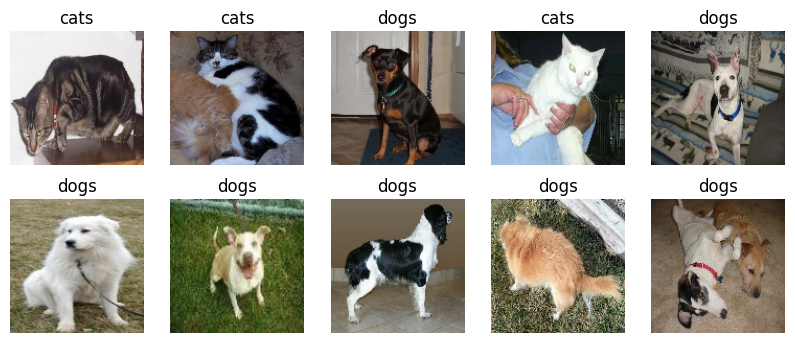

In [18]:
plt.figure(figsize=(10,4))
for image,label in trin_data.take(1):
  for i in range(12):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis("off")

In [19]:
for image , label in trin_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[124.81354    106.19479     79.63281   ]
   [126.78281    107.52579     84.568756  ]
   [126.878876   108.76953     83.13931   ]
   ...
   [143.6146     144.6146     128.6146    ]
   [143.07343    144.07343    128.07343   ]
   [143.61328    141.61328    129.61328   ]]

  [[120.375      105.66171     77.78125   ]
   [126.35309    111.19217     86.55621   ]
   [120.984375   106.          79.49219   ]
   ...
   [143.37491    144.37491    128.37491   ]
   [140.96255    141.96255    125.962555  ]
   [143.46484    141.46484    128.73593   ]]

  [[119.377625   109.640625    79.90756   ]
   [121.15625    110.58588     84.566376  ]
   [121.30609    111.90234     83.10422   ]
   ...
   [139.04703    140.04703    124.04703   ]
   [142.20306    143.20306    127.203064  ]
   [143.26953    141.26953    126.26953   ]]

  ...

  [[ 48.651093    54.501373    37.01306   ]
   [ 54.214966    45.464966    36.97281   ]
   [ 64.596405    55.085938    45.391876  ]
   ...
   [ 90.930786    87.154

In [20]:
trin_data = trin_data.map(lambda x,y: (x/255,y))
validation_data = validation_data.map(lambda x,y: (x/255,y))
test_data = test_data.map(lambda x,y: (x/255,y))

In [21]:
for image , label in trin_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.23826593 0.38728553 0.53238356]
   [0.23048407 0.37950367 0.5246017 ]
   [0.19964623 0.34866583 0.4937639 ]
   ...
   [0.99215686 0.99215686 0.99215686]
   [0.99215686 0.99215686 0.99215686]
   [0.99215686 0.99215686 0.99215686]]

  [[0.22071078 0.36973038 0.51482844]
   [0.22098604 0.37000564 0.5151037 ]
   [0.227462   0.3764816  0.5215796 ]
   ...
   [0.99215686 0.99215686 0.99215686]
   [0.99215686 0.99215686 0.99215686]
   [0.99215686 0.99215686 0.99215686]]

  [[0.18834108 0.3373607  0.48245874]
   [0.20524998 0.3542696  0.49936762]
   [0.23030025 0.37931985 0.5244179 ]
   ...
   [0.99215686 0.99215686 0.99215686]
   [0.99215686 0.99215686 0.99215686]
   [0.99215686 0.99215686 0.99215686]]

  ...

  [[0.76119936 0.41047794 0.3738664 ]
   [0.7694657  0.3858652  0.36001837]
   [0.7764787  0.3764706  0.35686275]
   ...
   [0.50474876 0.7086703  0.89690566]
   [0.43490684 0.6540968  0.85020584]
   [0.41815114 0.62894934 0.8113832 ]]

  [[0.76878065 0.4346814  0.393106

In [22]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.2),
    ]
)


In [ ]:
b